In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
Traindf=pd.read_excel('credit-cards.train.xlsx', skiprows=1)
Traindf.drop('ID', axis='columns',inplace= True)

Testdf=pd.read_excel('credit-cards.test.xlsx', skiprows=1)
Testdf.drop('ID', axis='columns',inplace= True)

Valdf=pd.read_excel('credit-cards.val.xlsx', skiprows=1)
Valdf.drop('ID', axis='columns',inplace= True)
Traindf.head()

# print(df.shape)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,120000,1,1,2,37,-1,2,-1,-1,-1,...,16885,46929,69521,0,316,16885,54629,77046,4499,0
1,240000,2,1,2,27,0,0,0,0,0,...,166291,141380,130742,7058,6800,4050,6084,8028,4267,0
2,80000,2,3,1,53,1,-1,-1,-2,-2,...,0,0,496,1710,0,0,0,496,2560,1
3,30000,1,2,1,35,1,-2,-2,-1,3,...,30821,30071,28767,0,0,35821,0,0,1000,0
4,70000,2,1,1,28,0,0,0,0,0,...,12170,-1686,-3594,5000,4000,12,0,0,0,0


In [4]:
Train_numerical_columns=Traindf[["AGE","LIMIT_BAL","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
Test_numerical_columns=Testdf[["AGE","LIMIT_BAL","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
Val_numerical_columns=Valdf[["AGE","LIMIT_BAL","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]



for column in Train_numerical_columns:
    # Compute the median value
    median_value_train = Traindf[column].median()

    # Replace each numerical value by a 1/0 based on whether it's greater than the median threshold
    Traindf[column] = (Traindf[column] > median_value_train).astype(int)
    
    
for column in Test_numerical_columns:
    # Compute the median value
    median_value_test = Testdf[column].median()
    
    # Replace each numerical value by a 1/0 based on whether it's greater than the median threshold
    Testdf[column] = (Testdf[column] > median_value_test).astype(int)
    
for column in Val_numerical_columns:
    # Compute the median value
    median_value_val = Valdf[column].median()

    # Replace each numerical value by a 1/0 based on whether it's greater than the median threshold
    Valdf[column] = (Valdf[column] > median_value_val).astype(int)
    
    
Valdf.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,2,1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,1,1,0
2,0,2,2,2,0,0,0,0,0,2,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,2,1,-1,-1,-1,0,0,...,1,1,1,0,1,1,1,1,1,0
4,0,2,3,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [5]:
Train_X = Traindf.iloc[:, :-1].values
Train_Y = Traindf.iloc[:, -1].values.reshape(-1,1)
Test_X = Testdf.iloc[:, :-1].values
Test_Y = Testdf.iloc[:, -1].values.reshape(-1,1)
Val_X = Valdf.iloc[:, :-1].values
Val_Y = Valdf.iloc[:, -1].values.reshape(-1,1)
np.shape(Val_X)
# 

(6000, 23)

In [6]:
class Node():
    def __init__(self,Y=None, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, nodes=0):
        ''' constructor ''' 
        
        # for decision node
        self.Y=Y
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.nodes=nodes
        # for leaf node
        self.value = value

In [11]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2, max_leaves=24):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.leaves=0
        self.max_leaves=max_leaves
        
#         self.accuracy_list=[]
        
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth and self.leaves<= self.max_leaves:
            # find the best split
            
                
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left

                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                 
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                

                return Node(Y ,best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, best_split["info_gain"], nodes=left_subtree.nodes + right_subtree.nodes + 1)
            
            
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        self.leaves= self.leaves+1
        return Node(value=leaf_value, nodes=1)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        
                        max_info_gain = curr_info_gain
                        
                        
        # return best split
        return best_split
 
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            print("leaves=")
            print(classifier.leaves)
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X, tree):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, tree) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        

        
#     def prune_level(self,accuracy_list, tree, level,root, depth=0):
#         if tree == None or root==None:
#             return;
#         if level == 1:
            
#             tree.value=self.calculate_leaf_value(tree.Y)
            
#             y_pred=self.predict(Test_X,root)
#             acc=accuracy_score(Test_Y, y_pred)
#             if acc>accuracy_list[depth]:
#                 accuracy_list[depth]=acc
            
#         elif (level > 1):
#             self.prune_level(accuracy_list,tree.left, level - 1, root, depth = depth +1)
#             self.prune_level(accuracy_list,tree.right, level - 1, root, depth = depth +1)
        
        
        
#     def accuracies(self, tree, maxdepth):
#         '''function to fill accuracy_list'''
#         root=tree
#         accuracy_list=[]
        
#         for j in range(10):
#             accuracy_list.append(0)
        
#         for i in range (1,maxdepth+1):
#             self.prune_level(accuracy_list,root,i,root,0)
            
#         return accuracy_list

        

In [12]:

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3, max_leaves=8)
classifier.fit(Train_X, Train_Y)
classifier.print_tree()
# Plotting the results
num_nodes = np.arange(1, 23)

# accuracy_list= classifier.accuracies(classifier.root, 4)
# accuracy_list
# plt.plot(num_nodes, accuracy_list, marker='o')
# plt.xlabel('Number of Nodes')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Number of Nodes in Decision Tree')
# plt.show()




X_5 <= 1 ? 0.06056172712358687
 left:X_6 <= 1 ? 0.013195120326163823
  left:X_19 <= 0 ? 0.0032349743250545404
    left:X_8 <= 0 ? 0.002647057694830812
        left:0
        right:leaves=
12
0
    right:leaves=
12
X_10 <= 0 ? 0.002577216513818592
        left:0
        right:leaves=
12
0
  right:leaves=
12
X_9 <= 0 ? 0.010018543304862348
    left:X_0 <= 0 ? 0.007168565029528229
        left:0
        right:leaves=
12
0
    right:leaves=
12
X_10 <= 0 ? 0.006564062756435507
        left:0
        right:leaves=
12
1
 right:leaves=
12
X_10 <= 0 ? 0.008056251486747601
  left:X_7 <= -1 ? 0.006189892945978159
    left:X_20 <= 0 ? 0.022469870204657072
        left:1
        right:leaves=
12
0
    right:leaves=
12
1
  right:leaves=
12
1


In [13]:
print(classifier.root.nodes)

23


Instead of plotting accuracy vs nodes, I have drawn accuracy vs leaf nodes (nearly proportional to nodes)

In [14]:
accuracy_list=[]
for i in range (2,24) :
    ClassifierTree=DecisionTreeClassifier(min_samples_split=3, max_depth=3, max_leaves=i)
    ClassifierTree.fit(Train_X, Train_Y)
    Y_pred = ClassifierTree.predict(Test_X, ClassifierTree.root) 
    accuracy_list.append(accuracy_score(Test_Y, Y_pred))
    
accuracy_list

[0.8085,
 0.8085,
 0.8103333333333333,
 0.8103333333333333,
 0.8101666666666667,
 0.8101666666666667,
 0.8106666666666666,
 0.8106666666666666,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333,
 0.8108333333333333]

The number of leaf nodes is used instead of total number of nodes (nearly proportional)

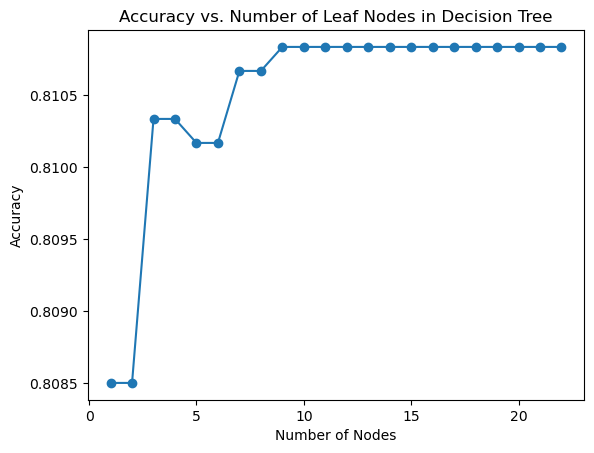

In [15]:
plt.plot(num_nodes, accuracy_list, marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Leaf Nodes in Decision Tree')
plt.show()
# num_nodes.shape
# len(num_nodes)


In [16]:
Y_pred = classifier.predict(Test_X, classifier.root) 

accuracy_score(Test_Y, Y_pred)

0.8106666666666666

In [17]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(Train_X, Train_Y)
model.score(Test_X, Test_Y)

0.739

In [18]:
c = DecisionTreeClassifier(min_samples_split=3, max_depth=4)
c.fit(Train_X, Train_Y)
c.print_tree()


X_5 <= 1 ? 0.06056172712358687
 left:X_6 <= 1 ? 0.013195120326163823
  left:X_19 <= 0 ? 0.0032349743250545404
    left:X_8 <= 0 ? 0.002647057694830812
        left:X_12 <= 0 ? 0.0020529745358556784
                left:0
                right:leaves=
12
0
        right:leaves=
12
X_0 <= 0 ? 0.005474504607890007
                left:0
                right:leaves=
12
0
    right:leaves=
12
X_10 <= 0 ? 0.002577216513818592
        left:X_0 <= 0 ? 0.001290546548292082
                left:0
                right:leaves=
12
0
        right:leaves=
12
X_9 <= 3 ? 0.0164474621062225
                left:0
                right:leaves=
12
1
  right:leaves=
12
X_9 <= 0 ? 0.010018543304862348
    left:X_0 <= 0 ? 0.007168565029528229
        left:X_10 <= 2 ? 0.003996555983559136
                left:0
                right:leaves=
12
1
        right:leaves=
12
X_6 <= 2 ? 0.0213395985031673
                left:0
                right:leaves=
12
1
    right:leaves=
12
X_10 <= 0 ? 0.006564062756435

In [19]:
Y_pred = c.predict(Test_X, c.root) 

accuracy_score(Test_Y, Y_pred)

0.8086666666666666

#### 